In [0]:
import numpy as np
import pandas as pd

In [0]:
houses=pd.read_csv("https://raw.githubusercontent.com/if1015-datascience/material/gh-pages/data/recife.csv",encoding = "ISO-8859-1")

In [7]:
houses.head()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type
0,1500,-8.059791,-34.889619,4.0,37.0,3.0,3.0,NaN,Boa Vista,Recife,Recife,Pernambuco,apart
1,330000,-8.029595,-34.900372,3.0,86.0,1.0,3.0,1.0,Tamarineira,Recife,Recife,Pernambuco,apart
2,255000,-8.037247,-34.890986,2.0,82.0,1.0,2.0,NaN,Encruzilhada,Recife,Recife,Pernambuco,apart
3,380000,-8.047562,-34.876964,3.0,95.0,2.0,3.0,1.0,Santo Amaro,Recife,Recife,Pernambuco,apart
4,300000,-8.053580,-34.908733,3.0,97.0,1.0,3.0,1.0,Madalena,Recife,Recife,Pernambuco,apart


In [10]:
houses['price'].mean()

465050.814793578

In [12]:
houses['price'].median()

350000.0

In [15]:
houses['price'].mode()

0    350000
dtype: int64

In [19]:
houses['price'].std()

592710.8681429924

In [26]:
houses['price'].describe()

count    1.744000e+03
mean     4.650508e+05
std      5.927109e+05
min      0.000000e+00
25%      2.300000e+03
50%      3.500000e+05
75%      6.300000e+05
max      7.500000e+06
Name: price, dtype: float64

In [35]:
from numpy import log
houses['log_price'] = log(houses['price'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [45]:
houses['log_price'].describe()

count    1744.000000
mean            -inf
std              NaN
min             -inf
25%         7.740664
50%        12.765688
75%        13.353475
max        15.830414
Name: log_price, dtype: float64

In [46]:
houses.shape

(1744, 14)

In [0]:
new_houses = houses.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

In [47]:
new_houses.shape

(758, 14)

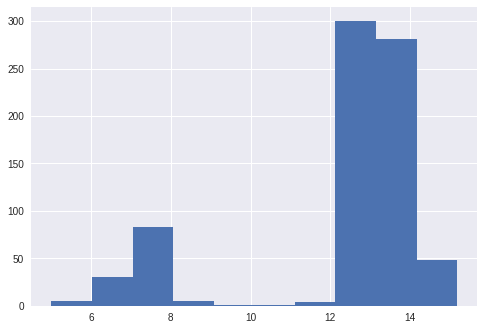

In [49]:
new_houses['log_price'].hist()

In [52]:
new_houses.cov()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,log_price
price,2.861067e+11,1798.900855,-524.598937,269688.257031,3.060636e+07,294992.844045,486778.125746,303086.728853,785613.041783
latitude,1.798901e+03,0.000793,0.000001,0.001786,7.729815e-02,0.000482,0.006096,0.000505,0.021195
longitude,-5.245989e+02,0.000001,0.000248,-0.000099,-9.697555e-02,-0.002457,-0.000854,-0.001889,0.002987
bedrooms,2.696883e+05,0.001786,-0.000099,0.779581,5.410271e+01,0.588753,0.764778,0.388929,0.826019
area,3.060636e+07,0.077298,-0.096976,54.102714,7.905619e+03,58.592597,72.826652,51.697636,62.825447
pkspaces,2.949928e+05,0.000482,-0.002457,0.588753,5.859260e+01,0.873780,0.744056,0.498632,0.498294
bathrooms,4.867781e+05,0.006096,-0.000854,0.764778,7.282665e+01,0.744056,1.550015,0.805126,1.775796
ensuites,3.030867e+05,0.000505,-0.001889,0.388929,5.169764e+01,0.498632,0.805126,0.766273,0.598669
log_price,7.856130e+05,0.021195,0.002987,0.826019,6.282545e+01,0.498294,1.775796,0.598669,5.241169


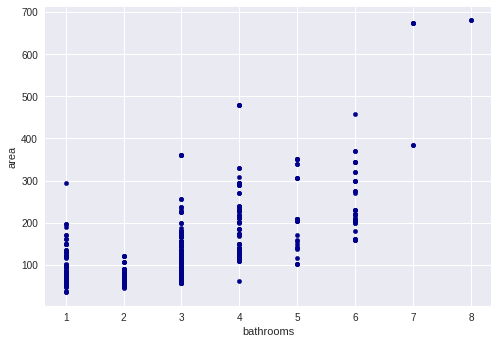

In [54]:
new_houses.plot.scatter(x='bathrooms',y='area', c='DarkBlue')

In [56]:
new_houses.corr(method='pearson')

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,log_price
price,1.000000,0.119401,-0.062232,0.571041,0.643546,0.589992,0.730969,0.647308,0.641550
latitude,0.119401,1.000000,0.003127,0.071821,0.030865,0.018313,0.173832,0.020475,0.328685
longitude,-0.062232,0.003127,1.000000,-0.007100,-0.069206,-0.166776,-0.043537,-0.136958,0.082789
bedrooms,0.571041,0.071821,-0.007100,1.000000,0.689161,0.713348,0.695724,0.503209,0.408644
area,0.643546,0.030865,-0.069206,0.689161,1.000000,0.704975,0.657892,0.664219,0.308641
pkspaces,0.589992,0.018313,-0.166776,0.713348,0.704975,1.000000,0.639347,0.609379,0.232847
bathrooms,0.730969,0.173832,-0.043537,0.695724,0.657892,0.639347,1.000000,0.738761,0.623033
ensuites,0.647308,0.020475,-0.136958,0.503209,0.664219,0.609379,0.738761,1.000000,0.298732
log_price,0.641550,0.328685,0.082789,0.408644,0.308641,0.232847,0.623033,0.298732,1.000000


In [57]:
new_houses.corr(method='spearman')

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,log_price
price,1.000000,0.192278,-0.060108,0.624596,0.639969,0.549012,0.797291,0.621902,1.000000
latitude,0.192278,1.000000,-0.076959,0.029028,0.025466,0.017051,0.120693,0.081576,0.192278
longitude,-0.060108,-0.076959,1.000000,-0.075638,-0.077150,-0.158698,-0.058734,-0.157348,-0.060108
bedrooms,0.624596,0.029028,-0.075638,1.000000,0.713995,0.749666,0.738118,0.565692,0.624596
area,0.639969,0.025466,-0.077150,0.713995,1.000000,0.624399,0.654882,0.615068,0.639969
pkspaces,0.549012,0.017051,-0.158698,0.749666,0.624399,1.000000,0.608702,0.566179,0.549012
bathrooms,0.797291,0.120693,-0.058734,0.738118,0.654882,0.608702,1.000000,0.682480,0.797291
ensuites,0.621902,0.081576,-0.157348,0.565692,0.615068,0.566179,0.682480,1.000000,0.621902
log_price,1.000000,0.192278,-0.060108,0.624596,0.639969,0.549012,0.797291,0.621902,1.000000
